In [24]:
import random
import pandas            as pd
import numpy             as np
import seaborn           as sns
from IPython.display               import Image 
from sklearn.model_selection       import train_test_split
from sklearn.naive_bayes           import GaussianNB
from sklearn.metrics               import accuracy_score
from sklearn.metrics               import confusion_matrix

# Naive Bayes Image

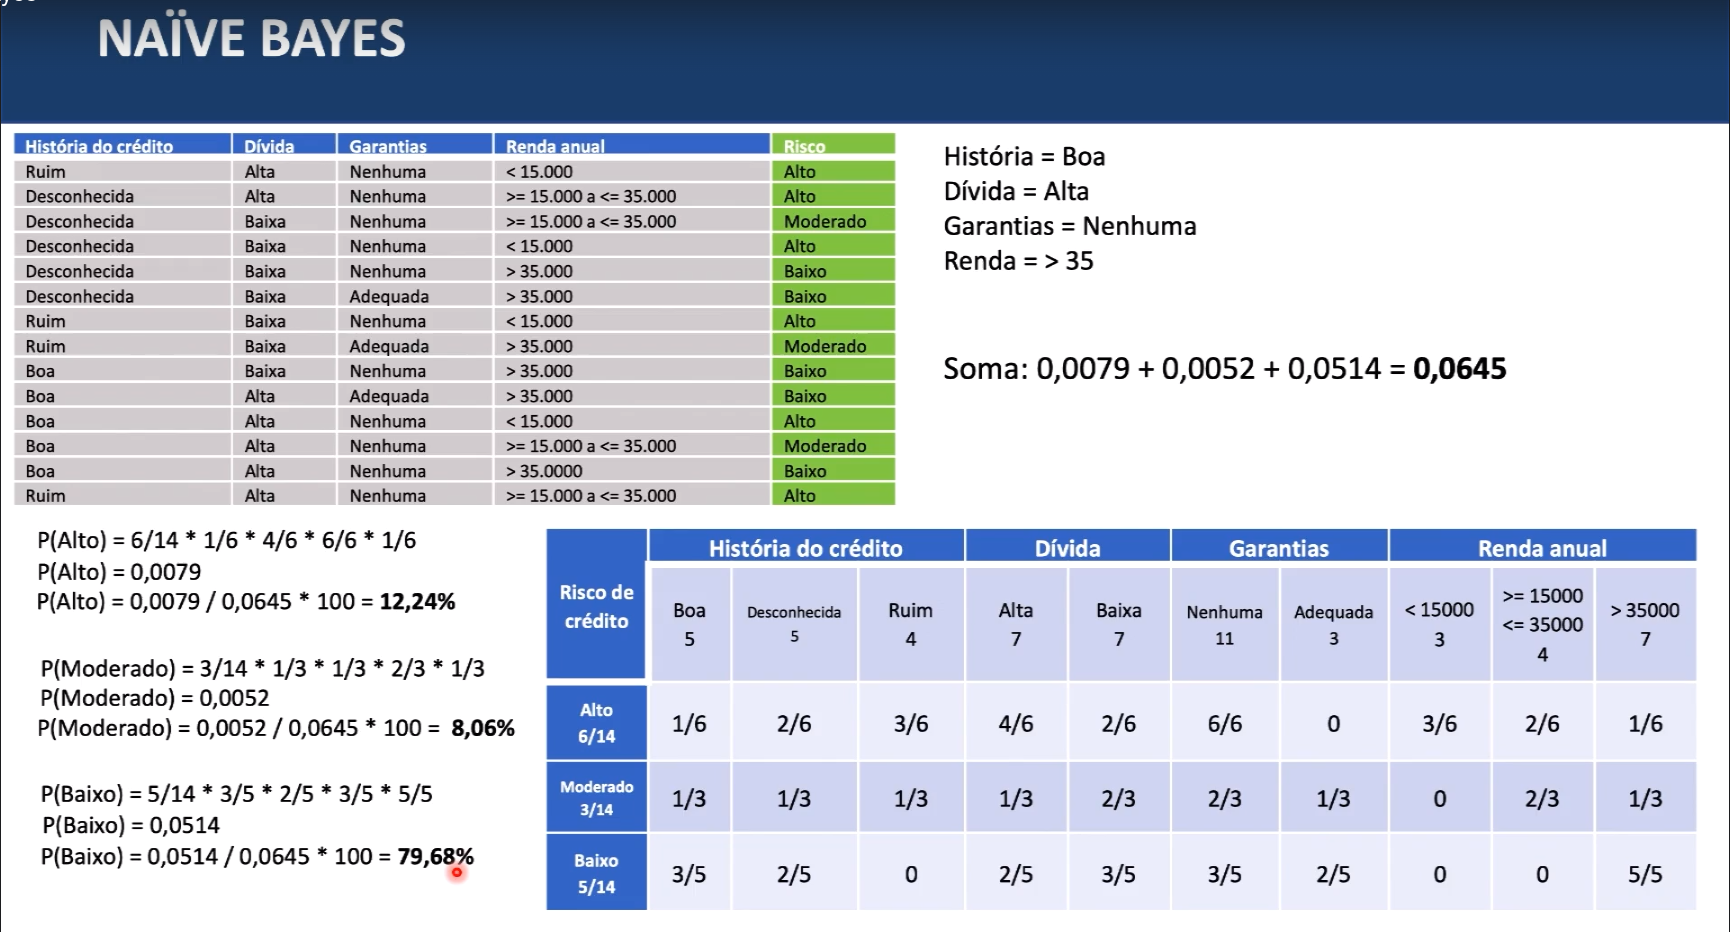

In [2]:
naive = Image(filename='../img/naive.png')
display(naive)

# Load data

In [3]:
data = pd.read_csv('Estatística+para+Ciência+de+Dados+e+Machine+Learning (1)/Estatística para Ciência de Dados e Machine Learning/Bases de dados/credit_data.csv')
data

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
data = data.rename(columns={'i#clientid': 'client_id', 'c#default':'pay'})

In [5]:
data.isna().sum()

client_id    0
income       0
age          3
loan         0
pay          0
dtype: int64

In [6]:
data = data.dropna()

In [11]:
data.pay.value_counts(normalize=True)

0    0.858287
1    0.141713
Name: pay, dtype: float64

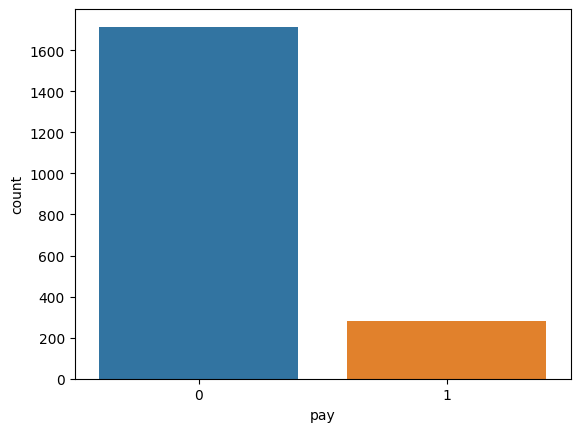

In [10]:
sns.countplot(x=data.pay);

# Train test Split

In [13]:
X = data.drop(columns=['client_id', 'pay'])
y = data.pay

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

In [15]:
X_train.shape, X_test.shape

((1597, 3), (400, 3))

In [16]:
y_train.shape, y_test.shape

((1597,), (400,))

# Classificação com Naive Bayes

In [19]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [20]:
predict = naive.predict(X_test)

In [23]:
(predict == y_test).sum()/len(y_test)

0.9325

In [25]:
accuracy_score( y_test, predict)

0.9325

In [35]:
cm = confusion_matrix( y_test, predict)
cm

array([[338,   5],
       [ 22,  35]])

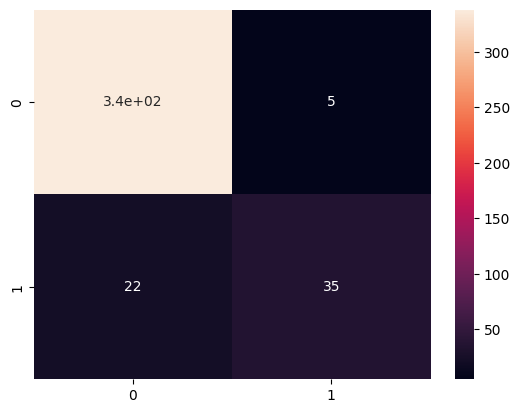

In [36]:
sns.heatmap(cm, annot=True);

In [37]:
# Percentual de acerto para pessoas class 0

In [38]:
338 / ( 338 + 22 )

0.9388888888888889

In [39]:
# Percentual de acerto para pessoas class 1

In [40]:
35 / (35 + 5)

0.875

# Undersampling - Tomek links

In [41]:
from imblearn.under_sampling import TomekLinks

In [49]:
tomek = TomekLinks(sampling_strategy='majority')
X_under, y_under = tomek.fit_resample(X_train, y_train)

In [52]:
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [48]:
X_under.shape, y_under.shape

((1519, 3), (1519,))

In [56]:
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_under, y_under)
predict_under = nb_gaussian.predict(X_test)

In [57]:
accuracy_score( y_test, predict_under)

0.9275

In [64]:
cm = confusion_matrix( y_test, predict_under)
cm

array([[336,   7],
       [ 22,  35]])

# Undersampling - Tomek links

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_train, y_train)

In [63]:
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [62]:
X_over.shape, y_over.shape

((2742, 3), (2742,))

In [65]:
nb_gaussian_ov = GaussianNB()
nb_gaussian_ov.fit(X_over, y_over)
predict_over = nb_gaussian_ov.predict(X_test)

In [66]:
accuracy_score( y_test, predict_over)

0.87

In [67]:
cm = confusion_matrix( y_test, predict_over)
cm

array([[295,  48],
       [  4,  53]])

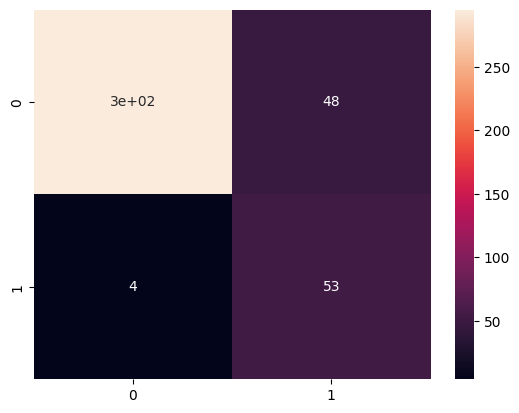

In [68]:
sns.heatmap(cm, annot=True);